# 2024 CODE 2기 활동 "프로젝트로 배우는 데이터사이언스" 4주차 과제입니다.

 - 강의를 수강한 후 본 과제를 수행하세요.
 - 개별적으로 과제를 수행한 후 팀원과 과제를 공유하고, 팀별로 하나의 최종 결과물을 완성하세요.
 - 완성한 결과물을 티스토리에 작성하세요.
 - 과제 데이터셋에 대한 모든 전처리와 모델 학습에 대해 정해진 방법은 없습니다.






이번 과제는 지금까지 학습한 분류모델을 새로운 데이터셋에 적용하는 것입니다.
아래 다섯가지 항목을 고려하여 과제를 진행해주세요.
1. 데이터를 로드하고 피처 엔지니어링을 진행하세요.
 - 데이터셋을 로드하고, 데이터셋의 구조와 통계, 분포 등을 확인하세요.
 - 다양한 방식으로 피처엔지니어링을 해주세요.
 - 필요에 따라 결측치 처리, 이상치 제거, 데이터 형식 변환 등의 전처리 작업을 수행하세요.
2. 분류학습을 위한 모델을 선택하세요.
 - 최소 두 가지 이상의 모델을 선택하세요.
3. 모델을 훈련시키세요.
 - 데이터셋을 학습데이터와 평가데이터를 분리하세요.
4. 하이퍼 파라미터튜닝을 진행하세요.
5. 모델 성능을 평가하고 모델을 선택하세요.






과제 데이터셋소개

**타이타닉 데이터셋**


    * 해당 Kaggle 데이터셋( https://www.kaggle.com/datasets/brendan45774/test-file)은 타이타닉호 탑승객 정보와 생존여부(Survived)에 대한 정보를 담고 있습니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * Passengerid: 탑승객 아이디
        * Survived: 생존유무(0 = No, 1 = Yes)
        * Pclass: 객실 등급(1 = 1st, 2 = 2nd, 3 = 3rd)
        * Name: 이름
        * Sex: 성별
        * Age: 나이
        * SibSp: 타이타닉에 탑승한 형제자매/배우자 수
        * Parch: 타이타닉에 탑승한 부모/자녀 수
        * Ticket:티켓 번호
        * Fare:요금
        * Cabin: 객실 번호
        * Embarked: 승선지(C = Cherbourg, Q = Queenstown, S = Southampton)


Target은 생존유무(Survived)입니다. 타이타닉호의 생존여부를 분류하는 모델을 만드는 것이 이번 주 목표입니다.

## 0.1 라이브러리 로드

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn에서 필요한 모듈 로드
# 전처리 모듈
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

# 예측 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
# Colab에서 구글 드라이브를 마운트합니다.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 0.2 데이터셋 로드 및 파악

In [5]:
# 데이터셋 로드
raw_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/2024_CODE_2기_상반기/titanic_train.csv")

In [6]:
raw_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
raw_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# 1 데이터 전처리

## 1.0 필요없는 컬럼들 정리
기존의 데이터프레임에서 우리가 학습에 관심있는 컬럼들만 골라주겠습니다.

배제될 컬럼:
- PassengerId: 실질적으로 index랑 동일한 역할
- Name: 이름 별로 학습하는 것은 효과가 적을 것으로 보임
- Ticket: 티켓 컬럼에서 얻을 수 있는 정보가 무엇일지 한번 살펴보겠습니다.

In [9]:
raw_data.sort_values('Ticket', ascending=False)
print("Ticket 컬럼에 있는 고유값의 개수: ", raw_data['Ticket'].nunique())

Ticket 컬럼에 있는 고유값의 개수:  681


In [67]:
raw_data.sort_values('Ticket')

PassengerId  Survived  Pclass  \
504          505         1       1   
257          258         1       1   
759          760         1       1   
262          263         0       1   
558          559         1       1   
..           ...       ...     ...   
235          236         0       3   
92            93         0       1   
219          220         0       2   
540          541         1       1   
745          746         0       1   

                                                  Name     Sex   Age  SibSp  \
504                              Maioni, Miss. Roberta  female  16.0      0   
257                               Cherry, Miss. Gladys  female  30.0      0   
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  female  33.0      0   
262                                  Taussig, Mr. Emil    male  52.0      1   
558             Taussig, Mrs. Emil (Tillie Mandelbaum)  female  39.0      1   
..                                                 ...     ...   ...    ...   
235                       Harknett, Miss. Alice Phoebe  female   NaN      0   
92                         Chaffee, Mr. Herbert Fuller    male  46.0      1   
219                                 Harris, Mr. Walter    male  30.0      0   
540                            Crosby, Miss. Harriet R  female  36.0      0   
745                       Crosby, Capt. Edward Gifford    male  70.0      1   

     Parch       Ticket    Fare Cabin Embarked  
504      0       110152  86.500   B79        S  
257      0       110152  86.500   B77        S  
759      0       110152  86.500   B77        S  
262      1       110413  79.650   E67        S  
558      1       110413  79.650   E67        S  
..     ...          ...     ...   ...      ...  
235      0   W./C. 6609   7.550   NaN        S  
92       0  W.E.P. 5734  61.175   E31        S  
219      0    W/C 14208  10.500   NaN        S  
540      2    WE/P 5735  71.000   B22        S  
745      1    WE/P 5735  71.000   B22        S  

[891 rows x 12 columns]

티켓 컬럼별로 그룹을 나누어서 보니 성이 똑같은 사람들끼리 같은 티켓을 보유하고 있는 경향을 볼 수 있습니다.

또한 티켓이 같은 사람들끼리 Pclass와 Fare도 동일한 것처럼 보입니다. 이를 직접 데이터로 확인해 보겠습니다.

In [10]:
# Ticket 별로 그룹 생성
ticket_group = raw_data.groupby('Ticket')

# Ticket 별로 그룹을 나눴을때, 같은 그룹 내에서 Pclass랑 Fare가 동일한지 확인
print("티켓 그룹 별 Pclass가 동일하지 않은 티켓 수: ", (ticket_group['Pclass'].nunique() > 1).sum())
print("티켓 그룹 별 Fare가 동일하지 않은 티켓 수: ", (ticket_group['Fare'].nunique() > 1).sum())

티켓 그룹 별 Pclass가 동일하지 않은 티켓 수:  0
티켓 그룹 별 Fare가 동일하지 않은 티켓 수:  1


In [11]:
# Fare가 동일하지 않은 티켓 그룹에 속한 샘플 확인
ticket_group.filter(lambda x: x['Fare'].nunique() > 1)

PassengerId  Survived  Pclass                           Name   Sex   Age  \
138          139         0       3            Osen, Mr. Olaf Elon  male  16.0   
876          877         0       3  Gustafsson, Mr. Alfred Ossian  male  20.0   

     SibSp  Parch Ticket    Fare Cabin Embarked  
138      0      0   7534  9.2167   NaN        S  
876      0      0   7534  9.8458   NaN        S

위에 보이는 두명을 제외하곤 모든 샘플들에서 티켓이 동일할 시 지불한 요금과 Pclass가 동일합니다.


그러므로 동일한 티켓을 보유하고 있는 사람들은 같이 탑승한 동반객이란 가설을 세워보겠습니다.

*물론 티켓에 적힌 고유값이 티켓 번호가 아니라 티켓의 등급을 나타내는 것일 수도 있지만, 그럴 경우 891개의 총 샘플들 중 681개의 티켓 고유값이 나오는 건 조금 어렵습니다. 배에서도 그렇게 다양한 티켓 종류를 만들어서 팔 이유가 없습니다.*

OneHotEncoding을 통해 티켓별로 컬럼을 만들 수 있겠지만, 너무 비효율적인 방식입니다.

대신 새로운 Same_ticket_count라는 컬럼을 만들어 동일한 티켓을 가진 인원이 총 몇명인지를 표기하고 그 정보를 사용하도록 하겠습니다.

또한 PassengerID, Name, Ticket컬럼은 제외하도록 하겠습니다.

In [12]:
# PassengerID, Name 컬럼 제거
df = raw_data.drop(['PassengerId', 'Name'], axis=1)

# 티켓 컬럼에서 "같은 티켓을 가진 승객 수" 정보 추출
df['Same_ticket_count'] = raw_data.groupby('Ticket')['Ticket'].transform('count')
df = df.drop('Ticket', axis=1)  # Ticket컬럼 제거

df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked  \
0         0       3    male  22.0      1      0   7.2500   NaN        S   
1         1       1  female  38.0      1      0  71.2833   C85        C   
2         1       3  female  26.0      0      0   7.9250   NaN        S   
3         1       1  female  35.0      1      0  53.1000  C123        S   
4         0       3    male  35.0      0      0   8.0500   NaN        S   

   Same_ticket_count  
0                  1  
1                  1  
2                  1  
3                  2  
4                  1

## 1.1 결측치 처리

In [13]:
# 컬럼 별 결측치 개수 파악
df.isnull().sum()

Survived               0
Pclass                 0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Fare                   0
Cabin                687
Embarked               2
Same_ticket_count      0
dtype: int64

총 418개의 데이터 중 Age와 Cabin 컬럼에 결측치가 다소 많은 것을 볼 수 있습니다.\
그리고 Embarked에 2개의 결측치가 있는 것을 확인할 수 있습니다.

사람에 나이가 없을 수는 없으니 Age는 단순히 기록이 손실되어 결측치가 남은 것 같습니다.

Cabin같은 경우에는 장거리 여행인만큼 모든 승객에게 객실을 제공했을 것이기에 동일하게 기록이 손실되어 결측치가 존재하는 것 같습니다.

Embarked에는 단 2개의 결측치가 있는데, 이도 기록이 남지 안아서 존재하는 결측치 같습니다.

### 1.1.1 Embarked 컬럼
Embarked는 세가지 출발지 중 가장 빈도가 높은 곳으로 채워주겠습니다. 결측치가 별로 없어 데이터에 그다지 큰 영향은 미치지 않을 것으로 보입니다.

In [14]:
# Embarked 컬럼 값별 개수 확인
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
# 결측치를 가장 빈도 수가 높은 'S'로 채워줍니다.
df['Embarked'].fillna('S', inplace=True)

# 결측치 채운 후 변화 확인
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### 1.1.2 Cabin 컬럼
Cabin 컬럼의 경우엔 총 891개의 열 중 687개가 결측치입니다. 결측치가 너무 많기 때문에 이걸 다른 값로 채워주다가는 bias가 높아질 위험이 있습니다. 그러므로 해당 컬럼은 학습에서 제외하겠습니다.

In [16]:
# Cabin 컬럼 제거
df.drop('Cabin', axis=1, inplace=True)

# Cabin 컬럼 제거 후 df.columns 확인
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Same_ticket_count'],
      dtype='object')

### 1.1.3 Age 컬럼
Age 컬럼에선 총 891개 중 177개의 결측치가 있습니다.

Age 컬럼의 분포도를 시각화 해서 보겠습니다.

<Axes: xlabel='Age', ylabel='Count'>

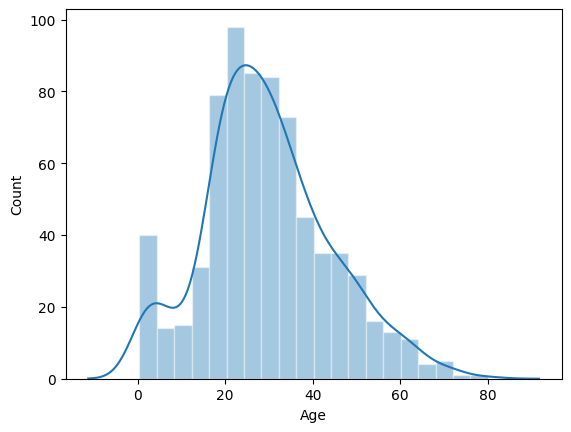

In [17]:
# histplot에서 자주 사용할 인자들을 dict로 만들어 저장합니다.
common_args = dict(
    kde=True,                   # Kernel Density Estimate 표시
    kde_kws=dict(cut=3),        # KDE 곡선을 그래프 양 옆 끝까지 연장
    alpha=.4,                   # 막대색을 더 투명하게
    edgecolor=(1, 1, 1, .4))    # 막대를 감싸는 선을 투명하게

# Age 컬럼 시각화
sns.histplot(data=df, x='Age', **common_args)

In [18]:
# Age 결측치 비율계산
df['Age'].isnull().sum() / df['Age'].size

0.19865319865319866

결측치 비율이 19.87%로 30%보다는 적음으로 다른 값으로 대체를 해주겠습니다.

Age 항목은 수치형 변수이기 때문에 평균값을 계산해서 채워주도록 하겠습니다.

<Axes: xlabel='Age', ylabel='Count'>

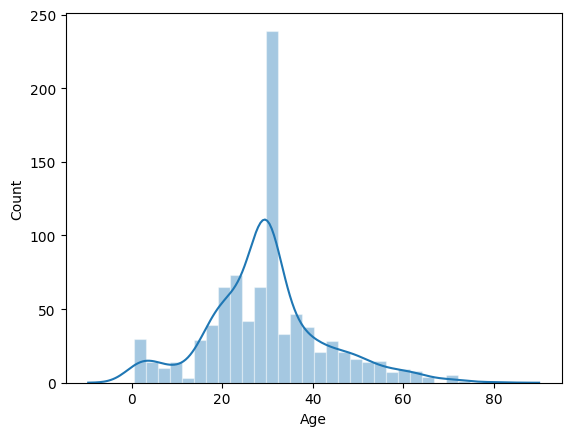

In [19]:
# Age 결측치 채워주기
df['Age'] = df['Age'].fillna(df['Age'].mean())

# 결측치 치환 된 Age_filled 분포도 시각화
sns.histplot(data=df, x='Age', **common_args)

## 1.2 데이터 시각화

### 1.2.1 총 데이터 시각화

In [20]:
# 처리된 데이터를 보겠습니다.
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0         0       3    male  22.0      1      0   7.2500        S   
1         1       1  female  38.0      1      0  71.2833        C   
2         1       3  female  26.0      0      0   7.9250        S   
3         1       1  female  35.0      1      0  53.1000        S   
4         0       3    male  35.0      0      0   8.0500        S   

   Same_ticket_count  
0                  1  
1                  1  
2                  1  
3                  2  
4                  1

histplot을 이용해 각 컬럼별 분포를 확인해 보겠습니다.

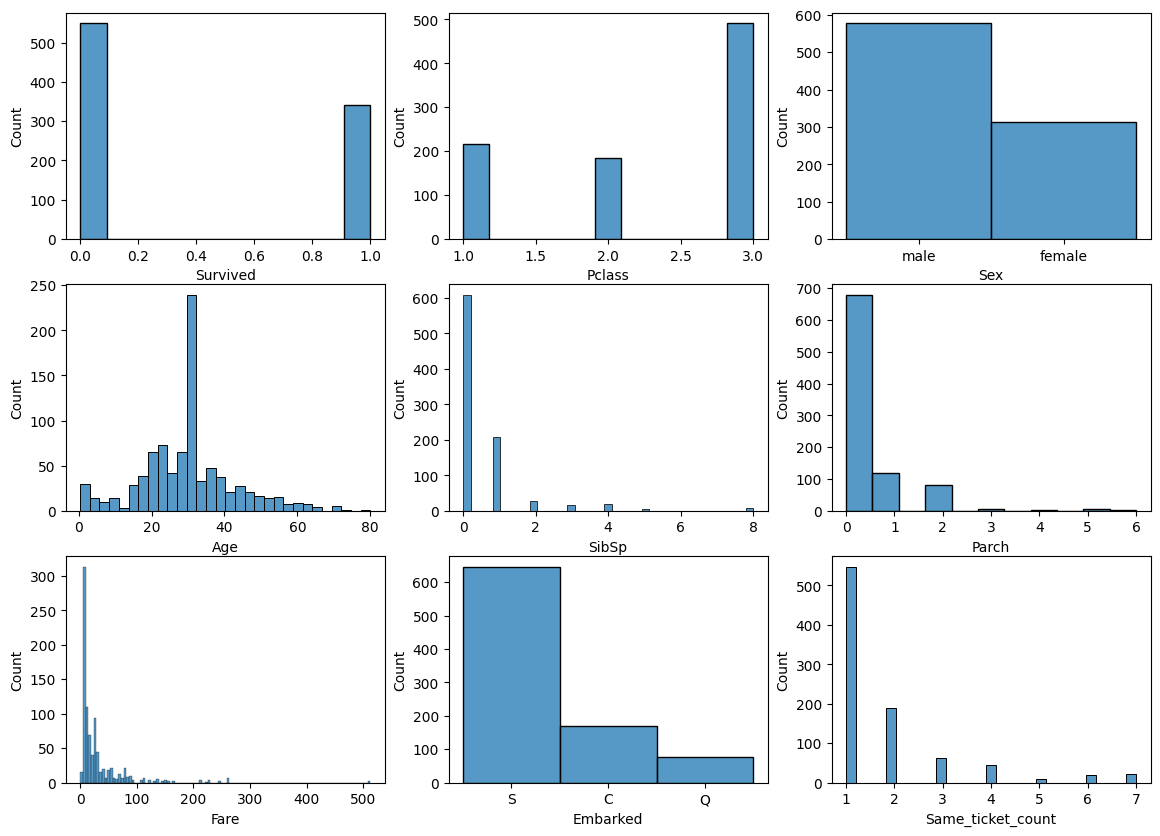

In [21]:
sns.set_style()

# 서브 플롯 만들기
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axes[i // 3, i % 3])

### 1.2.2 Survived별로 나눈 데이터 시각화

추가적으로 타겟 변수인 Survived를 제외한 나머지 변수들의 Survived별 분포도 시각화 해주겠습니다.

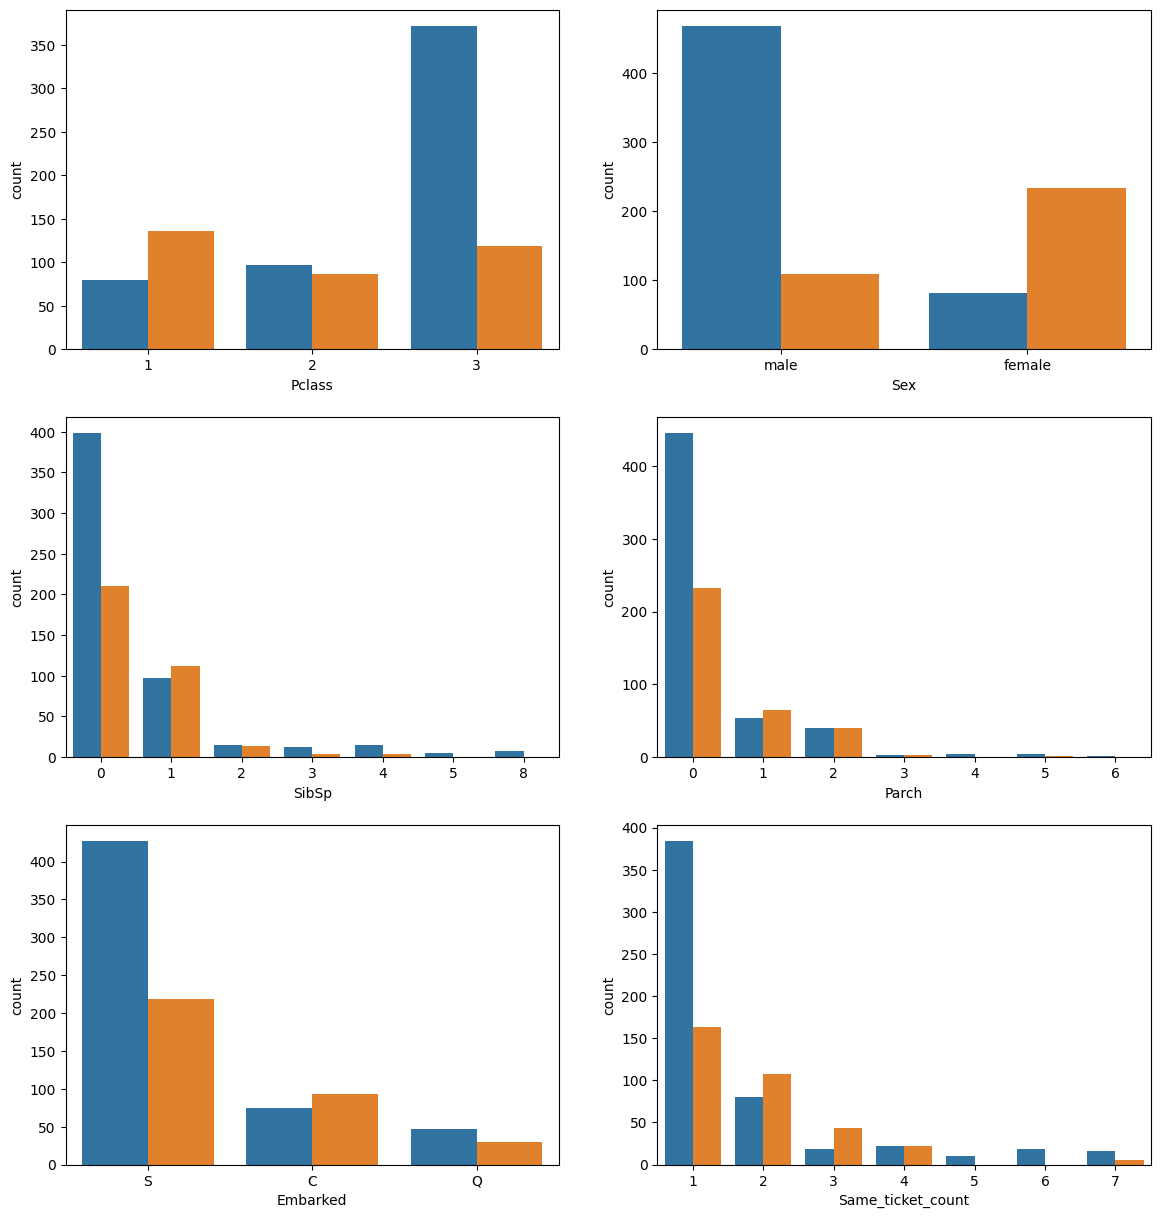

In [22]:
# 서브 플롯 만들기
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))

# 범주형 변수 시각화
for i, column in enumerate(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Same_ticket_count']):

    ax = sns.countplot(df, x=column, hue='Survived', legend=False,
                 ax=axes[(i//2), (i%2)])

특이사항:
- Pclass가 1인 승객들에서만 생존 비율이 50%보다 높습니다.
- 여자 승객들 생존 비율이 남자 승객 생존 비율보다 훨씬 높습니다.
- 혼자 탑승한 사람보다, 형제자매, 배우자, 부모 또는 자식 1명 또는 2명이랑 동반 탑승한 승객의 생존률이 높습니다.
- Cherbourg에서 탑승한 승객의 생존 비율이 다른 두 도시보다 높습니다.
- 같은 티켓을 보유한 승객이 2~4명일 경우 생존비율이 다른 동반자 수의 승객보다 높습니다.

<Axes: xlabel='Fare', ylabel='Count'>

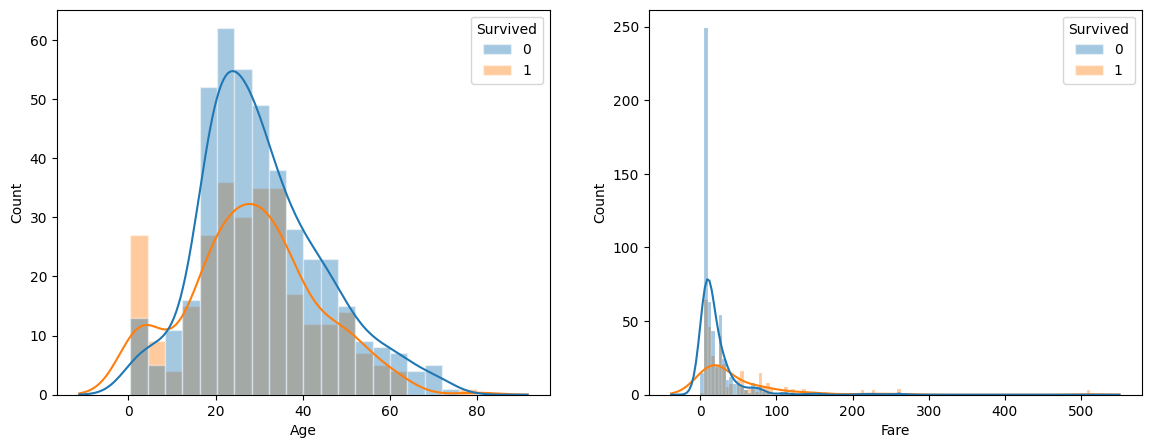

In [23]:
# 연속형 변수 시각화
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

# Age 변수는 결측치 처리 전 데이터를 시각화해서 보도록 하겠습니다.
sns.histplot(data=raw_data, x='Age', hue='Survived', **common_args, ax=axes[0])
sns.histplot(data=df, x='Fare', hue='Survived', **common_args, ax=axes[1])

특이사항:
- 나이의 분포도는 생존자랑 사망자 둘다 비슷한 정규분포의 모습을 띄고 있으나, 생존자 분포도에서 나이가 낮은 승객들이 예외적으로 많다는 것을 볼 수 있습니다.
- 요금의 분포도는 lognormal 분포를 띄고 있고, 높은 요금에선 생존 비율이 높아지는 것을 볼 수 있습니다.

### 1.2.1 Lmplot 이용한 연속형 변수 시각화
유일한 두 연속형 변수인 Age와 Fare의 선형관계를 lmplot을 통해 시각화해 보겠습니다.

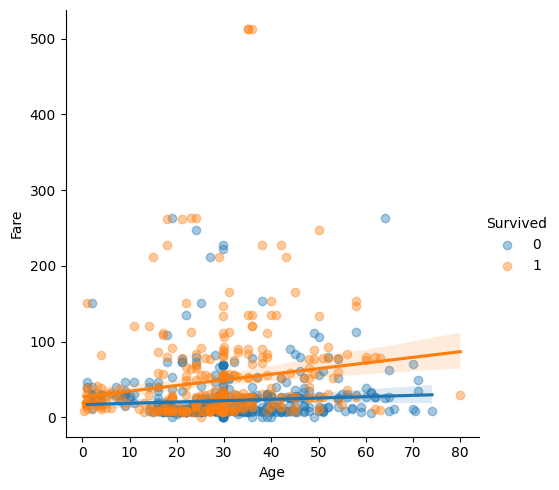

In [24]:
sns.lmplot(data=df, x='Age', y='Fare', hue='Survived', scatter_kws={'alpha': 0.4})

나이와 요금은 생존자든 사망자든 극명한 선형관계를 보여주지 않는 것 같습니다.

### 1.2.4 상관계수 계산 및 상관행렬 시각화

pandas를 통해 수치형 데이터의 상관계수를 계산한 후 ```sns.heatmap```을 이용해 시각화 하겠습니다.

<ipython-input-25-410f7d4b906a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


<Axes: >

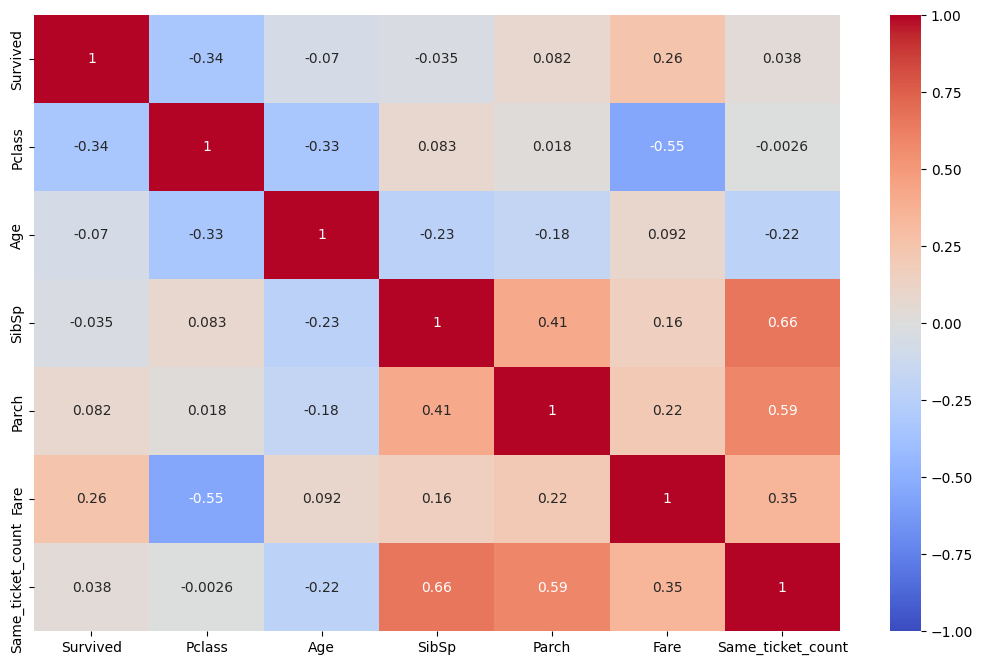

In [25]:
# 상관계수 계산
df_corr = df.corr()

# 위에서 구한 상관계수를 heatmap으로 시각화합니다.
plt.figure(figsize=(13,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm')

각각의 상관계수들 중 뚜렷하거나 강한 선형관계를 보이는 상관계수들을  분석해 보겠습니다.

첫 항목 | 둘째 항목 | 상관계수 | 강도 | 분석
-------|----------|---------|-----|------
Survived | Pclass | -0.34 | 뚜렷한 음적 선형관계 | 객실 등급이 낮을 수록 생존비율이 낮아진 것을 보여줍니다.
Pclass | Age | -0.33 | 뚜렷한 음적 선형관계 | 나이가 많을 수록 더 객실 등급이 높을 경향이 있다는 것을 보여줍니다.
Pclass | Fare | -0.55 | 뚜렷한 음적 선형관계 | 더 많은 비용을 냈을 수록 더 객실 등급이 높을 경향이 있다는 것을 보여줍니다.
Sibsp | Parch | 0.41 | 뚜렷한 양적 선형관계 | 부모/자식과 같이 온 승객일 수록 배우자/형제자매랑 같이 탑승했을 경향이 있다는 것을 보여줍니다.
Sibsp | Same_ticket_count | 0.66 | 뚜렷한 양적 선형관계 | 같은 티켓을 보유한 승객이 많을 수록 더 많은 배우자/형제자매랑 같이 탑승했을 경향이 있다는 것을 보여줍니다.
Parch | Same_ticket_count | 0.59 | 뚜렷한 양적 선형관계 | 같은 티켓을 보유한 승객이 많을 수록 더 많은 부모/자식랑 같이 탑승했을 경향이 있다는 것을 보여줍니다.
Fare | Same_ticket_count | 0.35 | 뚜렷한 양적 선형관계 | 같은 티켓을 보유한 승객이 많을 수록 더 많은 요금을 냈을 경향이 있다는 것을 보여줍니다.


## 1.3 변수 Encoding

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   Pclass             891 non-null    int64  
 2   Sex                891 non-null    object 
 3   Age                891 non-null    float64
 4   SibSp              891 non-null    int64  
 5   Parch              891 non-null    int64  
 6   Fare               891 non-null    float64
 7   Embarked           891 non-null    object 
 8   Same_ticket_count  891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


항목들을 봤을 때, Sex와 Embarked 컬럼들이 object 데이터 타입을 갖고 있습니다.

In [27]:
df[['Sex', 'Embarked']].apply(np.unique)

Sex         [female, male]
Embarked         [C, Q, S]
dtype: object

* Sex:
    - female, male로 나뉩니다.
* Embarked:
    - 승선지(C = Cherbourg, Q = Queenstown, S = Southampton)
    - 3 종류의 승선지 값이 담겨 있습니다.

값이 2종류인 Sex 컬럼은 LabelEncoder로, 값이 3종류 이상인 Embarked는 OneHotEncoder로 실수화 해주겠습니다.

In [28]:
# 사이킷런의 LabelEncoder를 사용하여 수치형으로 변환
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [29]:
# 사이킷런의 OneHotEncoder를 사용하여 수치형으로 변환
ohe = OneHotEncoder(categories='auto', sparse_output=False, dtype=np.int32)

ohe_df = ohe.fit_transform(df[['Embarked']])
ohe_df = pd.DataFrame(ohe_df, index=df.index, columns=ohe.get_feature_names_out())

# 만들어진 dataframe을 이전 dataframe과 조인
df_encoded = pd.concat([df, ohe_df], axis=1)
df_encoded.drop('Embarked', axis=1, inplace=True)

In [30]:
df_encoded.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Same_ticket_count  \
0         0       3    1  22.0      1      0   7.2500                  1   
1         1       1    0  38.0      1      0  71.2833                  1   
2         1       3    0  26.0      0      0   7.9250                  1   
3         1       1    0  35.0      1      0  53.1000                  2   
4         0       3    1  35.0      0      0   8.0500                  1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

# 2 피쳐 엔지니어링

## 2.1 탑승 동반자 수

Sibsp, Parch, Same_ticket_count 모두 다 개별 승객의 동반자 수에 대한 정보를 주는 컬럼들입니다.

다음 정보를 얻을 수 있습니다:
* Same_ticket_count - 1 : 본인 제외 동일한 티켓을 가진 승객의 개수
* Sibsp + Parch : 같이 탑승한 가족 수

그러면 다음과 같은 경우에 수가 생깁니다:
* Same_ticket_count - 1 > Sibsp + Parch
    - 가족이외에 같은 지인이랑도 같이 티켓을 구매
* Same_ticket_count - 1 == Sibsp + Parch
    - 가족끼리만 같은 티켓을 구매 (혹은 혼자 탑승)
* Same_ticket_count - 1 < Sibsp + Parch
    - 가족끼리도 따로 티켓을 구매해서 탑승

*단, train 데이터 말고 test 데이터로 옮겨진 샘플들도 있습니다.*

In [31]:
print((df['Same_ticket_count'] - 1 > df['SibSp'] + df['Parch']).sum())
print((df['Same_ticket_count'] - 1 == df['SibSp'] + df['Parch']).sum())
print((df['Same_ticket_count'] - 1 < df['SibSp'] + df['Parch']).sum())

97
603
191


## 2.2 인당 요금 계산

In [32]:
raw_data.sort_values('Ticket', ascending=False).tail(10)

PassengerId  Survived  Pclass  \
366          367         1       1   
430          431         1       1   
110          111         0       1   
475          476         0       1   
558          559         1       1   
585          586         1       1   
262          263         0       1   
504          505         1       1   
257          258         1       1   
759          760         1       1   

                                                  Name     Sex   Age  SibSp  \
366   Warren, Mrs. Frank Manley (Anna Sophia Atkinson)  female  60.0      1   
430          Bjornstrom-Steffansson, Mr. Mauritz Hakan    male  28.0      0   
110                     Porter, Mr. Walter Chamberlain    male  47.0      0   
475                        Clifford, Mr. George Quincy    male   NaN      0   
558             Taussig, Mrs. Emil (Tillie Mandelbaum)  female  39.0      1   
585                                Taussig, Miss. Ruth  female  18.0      0   
262                                  Taussig, Mr. Emil    male  52.0      1   
504                              Maioni, Miss. Roberta  female  16.0      0   
257                               Cherry, Miss. Gladys  female  30.0      0   
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  female  33.0      0   

     Parch  Ticket   Fare Cabin Embarked  
366      0  110813  75.25   D37        C  
430      0  110564  26.55   C52        S  
110      0  110465  52.00  C110        S  
475      0  110465  52.00   A14        S  
558      1  110413  79.65   E67        S  
585      2  110413  79.65   E68        S  
262      1  110413  79.65   E67        S  
504      0  110152  86.50   B79        S  
257      0  110152  86.50   B77        S  
759      0  110152  86.50   B77        S

**1.0 필요없는 컬럼들 정리**에서 같은 티켓을 보유한 사람들끼리는 동일한 Fare값을 갖고 있는 것을 확인했습니다. (한팀 제외)


여기서 같은 티켓을 구매한 승객들은 자신과 동반자들이 계산한 총 요금이 표시 되었다고 가정해 보겠습니다.

Fare를 Same_ticket_count로 나눠 인당 요금을 계산하여 새로운 컬럼으로 추가해주겠습니다.

In [33]:
df['Fare_per_person'] = df['Fare'] / df['Same_ticket_count']
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  \
0         0       3    1  22.0      1      0   7.2500        S   
1         1       1    0  38.0      1      0  71.2833        C   
2         1       3    0  26.0      0      0   7.9250        S   
3         1       1    0  35.0      1      0  53.1000        S   
4         0       3    1  35.0      0      0   8.0500        S   

   Same_ticket_count  Fare_per_person  
0                  1           7.2500  
1                  1          71.2833  
2                  1           7.9250  
3                  2          26.5500  
4                  1           8.0500

위 가정이 맞는지 Fare와 Fare_per_person을 각각 시각화하여 Pclass랑 비교해 보겠습니다.



<Axes: xlabel='Fare_per_person', ylabel='Count'>

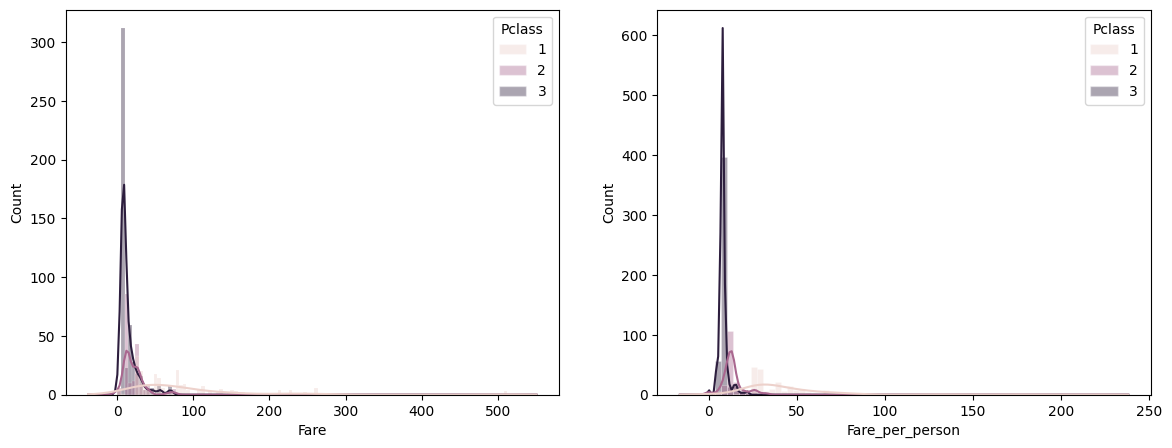

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

sns.histplot(data=df, x='Fare', hue='Pclass', **common_args, ax=axes[0])
sns.histplot(data=df, x='Fare_per_person', hue='Pclass', **common_args, ax=axes[1])

범위가 너무 커 분포도 구분이 어려워 앞 쪽 샘플들만 시각화해서 보겠습니다.

<Axes: xlabel='Fare_per_person', ylabel='Count'>

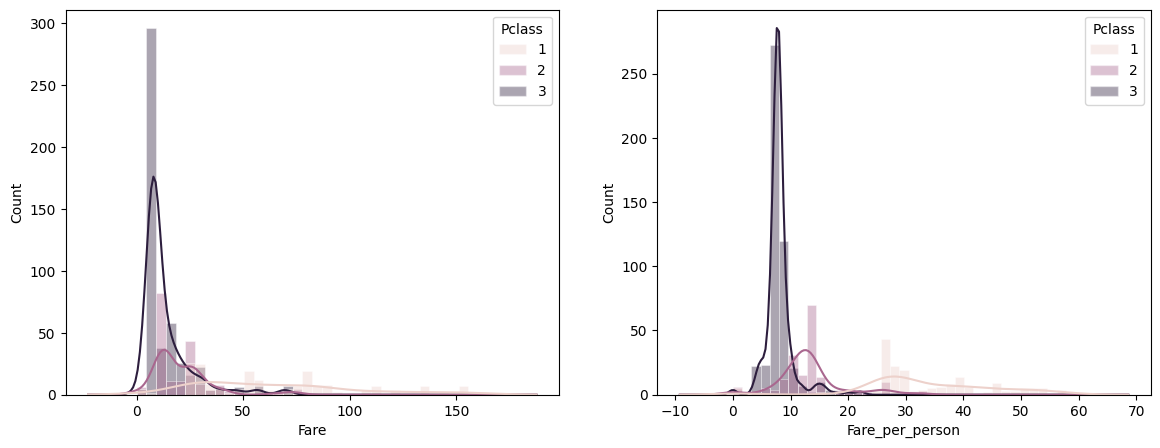

In [35]:
# 자세한 분석을 위해 너무 높은 값들은 제외
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

sns.histplot(data=df[df['Fare'] < 200], x='Fare', hue='Pclass', **common_args, ax=axes[0])
sns.histplot(data=df[df['Fare_per_person'] < 60], x='Fare_per_person', hue='Pclass', **common_args, ax=axes[1])

확실히 Fare_per_person의 값들이 등급별 가격차를 더 뚜렸하게 나타내는 것을 볼 수 있습니다.

이는 Fare가 승객 혼자만의 탑승 금액이 아닌 자신과 동반자들이 지불한 총 요금이라는 가설을 뒷받침해줍니다.

Fare과 Fare_per_person 컬럼의 통계치를 비교해서 보겠습니다.

In [36]:
df[['Fare', 'Fare_per_person']].describe()

Fare  Fare_per_person
count  891.000000       891.000000
mean    32.204208        17.788989
std     49.693429        21.218157
min      0.000000         0.000000
25%      7.910400         7.762500
50%     14.454200         8.850000
75%     31.000000        24.288200
max    512.329200       221.779200

총 범위는 줄었으나 아직 높은 금액대들이 관찰되는 것을 볼 수 있습니다.

Fare_per_person이 100을 넘는 사람들의 샘플을 확인해보겠습니다.

In [37]:
temp_df = raw_data.copy()
temp_df['Same_ticket_count'] = temp_df.groupby('Ticket')['Ticket'].transform('count')
temp_df['Fare_per_person'] = temp_df['Fare'] / temp_df['Same_ticket_count']

In [38]:
temp_df[temp_df['Fare_per_person'] > 100].sort_values('Ticket')

PassengerId  Survived  Pclass  \
377          378         0       1   
527          528         0       1   
118          119         0       1   
299          300         1       1   
311          312         1       1   
742          743         1       1   
258          259         1       1   
679          680         1       1   
737          738         1       1   

                                                Name     Sex   Age  SibSp  \
377                        Widener, Mr. Harry Elkins    male  27.0      0   
527                               Farthing, Mr. John    male   NaN      0   
118                         Baxter, Mr. Quigg Edmond    male  24.0      0   
299  Baxter, Mrs. James (Helene DeLaudeniere Chaput)  female  50.0      0   
311                       Ryerson, Miss. Emily Borie  female  18.0      2   
742            Ryerson, Miss. Susan Parker "Suzette"  female  21.0      2   
258                                 Ward, Miss. Anna  female  35.0      0   
679               Cardeza, Mr. Thomas Drake Martinez    male  36.0      0   
737                           Lesurer, Mr. Gustave J    male  35.0      0   

     Parch    Ticket      Fare            Cabin Embarked  Same_ticket_count  \
377      2    113503  211.5000              C82        C                  1   
527      0  PC 17483  221.7792              C95        S                  1   
118      1  PC 17558  247.5208          B58 B60        C                  2   
299      1  PC 17558  247.5208          B58 B60        C                  2   
311      2  PC 17608  262.3750  B57 B59 B63 B66        C                  2   
742      2  PC 17608  262.3750  B57 B59 B63 B66        C                  2   
258      0  PC 17755  512.3292              NaN        C                  3   
679      1  PC 17755  512.3292      B51 B53 B55        C                  3   
737      0  PC 17755  512.3292             B101        C                  3   

     Fare_per_person  
377         211.5000  
527         221.7792  
118         123.7604  
299         123.7604  
311         131.1875  
742         131.1875  
258         170.7764  
679         170.7764  
737         170.7764

총 9명의 승객이 100이상의 Fare_per_person을 보유하고 있습니다.

이렇게 높은 이상치가 있는 이유를 생각해 보았을때, 비록 동반자와 탑승을 했으나 그 동반자가 train 데이터셋에 포함되어 있지 않고, test 데이터셋에 있을 경우 Ticket을 공유하는 승객수가 정확하게 나오지 않아 높은 Fare_per_person 값이 나올 수 있다고 생각했습니다.

<Axes: xlabel='Fare_per_person', ylabel='Count'>

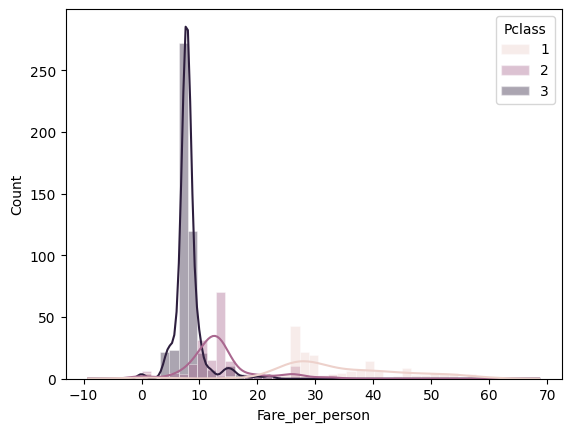

In [39]:
# 이상치들을 제외한 분포도를 시각화
sns.histplot(data=df[df['Fare_per_person'] < 60], x='Fare_per_person', hue='Pclass', **common_args)

정보를 찾아보니 3등급 티켓은 7파운드, 2등급 티켓은 12파운드, 1등급 티켓은 30파운드에 팔렸다는 정보를 확인했습니다. [참조](https://www.nbclosangeles.com/news/national-international/history-of-the-titanic-10-questions-about-the-ill-fated-ship/3173692/#:~:text=Second%2Dclass%20tickets%20were%2012,class%20tickets%20would%20be%20%241%2C071.)

예측 및 학습에도 그럼 Fare보단 Fare_per_person 컬럼을 사용해 주겠습니다.

In [40]:
df_encoded['Fare_per_person'] = df['Fare_per_person']
df_encoded.drop('Fare', axis=1, inplace=True)
df_encoded.head()

Survived  Pclass  Sex   Age  SibSp  Parch  Same_ticket_count  Embarked_C  \
0         0       3    1  22.0      1      0                  1           0   
1         1       1    0  38.0      1      0                  1           1   
2         1       3    0  26.0      0      0                  1           0   
3         1       1    0  35.0      1      0                  2           0   
4         0       3    1  35.0      0      0                  1           0   

   Embarked_Q  Embarked_S  Fare_per_person  
0           0           1           7.2500  
1           0           0          71.2833  
2           0           1           7.9250  
3           0           1          26.5500  
4           0           1           8.0500

## 2.3 분포도 정규화

정규화(Normalization)는 일반적으로 서로 다른 변수의 크기를 통일하기 위해

$\frac{x_{i} - min(x)}{max(x) - min(x))}$ 을 적용해주는 기법입니다.

Scikit-learn에서 제공하는 정규화 알고리즘인 MinMaxScaler로 범위가 큰 Age와 Fare_per_person을 정규화 하겠습니다.

In [41]:
# 각 컬럼별 범위 확인
df_encoded.agg(['min', 'max'])

Survived  Pclass  Sex    Age  SibSp  Parch  Same_ticket_count  \
min         0       1    0   0.42      0      0                  1   
max         1       3    1  80.00      8      6                  7   

     Embarked_C  Embarked_Q  Embarked_S  Fare_per_person  
min           0           0           0           0.0000  
max           1           1           1         221.7792

In [42]:
scaler = MinMaxScaler()
scaler.fit(df_encoded[['Age', 'Fare_per_person']])
scale = scaler.transform(df_encoded[['Age', 'Fare_per_person']])

In [43]:
df_scaled = df_encoded.copy()
df_scaled[['Age', 'Fare_per_person']] = scale
df_scaled[['Age', 'Fare_per_person']].describe()

Age  Fare_per_person
count  891.000000       891.000000
mean     0.367921         0.080210
std      0.163383         0.095672
min      0.000000         0.000000
25%      0.271174         0.035001
50%      0.367921         0.039905
75%      0.434531         0.109515
max      1.000000         1.000000

# 2 학습 / 예측 데이터셋 나누기
사이킷런에서 제공하는 model_selection의 ```train_test_split```을 사용해 주겠습니다.

In [44]:
# 학습에 사용할 항목들을 별도로 분류합니다
feature_names = df_encoded.columns[1:]
label_name = 'Survived'

In [45]:
# train_test_split으로 학습/예측 데이터셋을 분류합니다. 비율 학습 8 : 예측 2
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded[feature_names], df_encoded[label_name], test_size=0.2, random_state=42)

In [46]:
# 각 세트별 문제와 정답의 데이터 수 확인합니다.
print("학습: X:", X_train.shape, " y:", y_train.shape)
print("예측: X:", X_test.shape, " y:", y_test.shape)

학습: X: (712, 10)  y: (712,)
예측: X: (179, 10)  y: (179,)


In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             712 non-null    int64  
 1   Sex                712 non-null    int64  
 2   Age                712 non-null    float64
 3   SibSp              712 non-null    int64  
 4   Parch              712 non-null    int64  
 5   Same_ticket_count  712 non-null    int64  
 6   Embarked_C         712 non-null    int32  
 7   Embarked_Q         712 non-null    int32  
 8   Embarked_S         712 non-null    int32  
 9   Fare_per_person    712 non-null    float64
dtypes: float64(2), int32(3), int64(5)
memory usage: 52.8 KB


# 3 학습과 예측하기

In [48]:
# DecisionTree를 불러옵니다.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [49]:
# 학습과정 진행
model.fit(X_train, y_train)

# 예측
y_predict = model.predict(X_test)
print(y_predict.shape)

(179,)


## 3.1 의사결정 나무 시각화

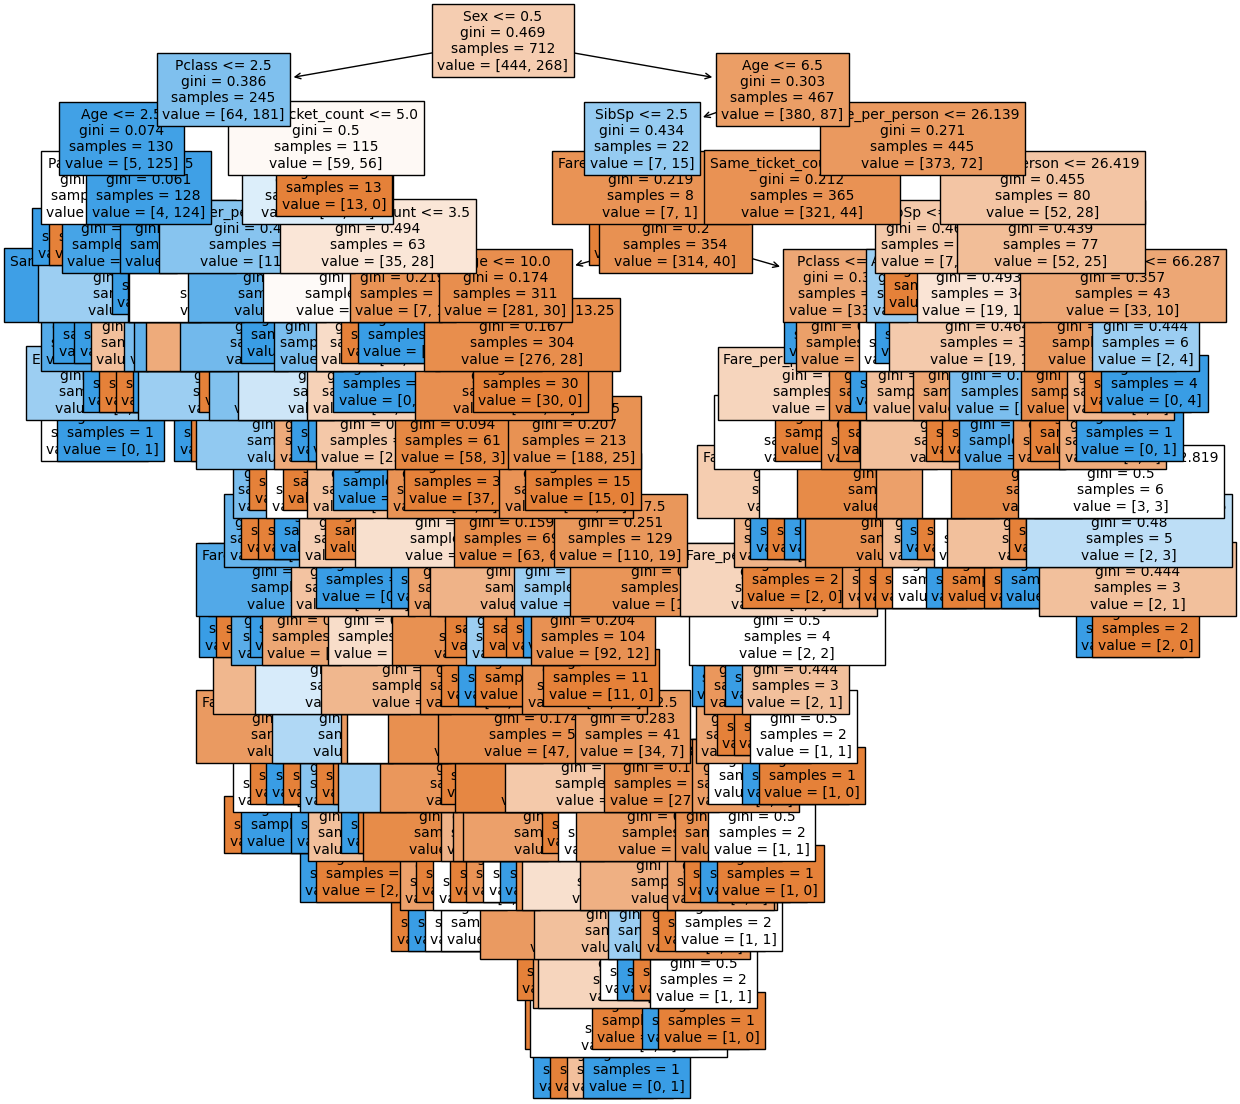

In [68]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

각 branch마다 아래쪽으로 갈수록 샘플 수가 엄청 적어지면서 overfitting 현상이 발생합니다. (특정 샘플에 너무 맞추는 케이스)

# 6) 정확도(Accuracy) 측정하기

In [51]:
# 실제 답과 예측값이 얼마나 차이가 나는지 구합니다.
diff_count = (y_predict != y_test).sum()
print(f"틀린 개수는 {diff_count}개입니다.")

틀린 개수는 42개입니다.


In [52]:
# 예측의 정확도를 구합니다.
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predict) * 100
print(f"정확도는 {acc}입니다.")

정확도는 76.53631284916202입니다.


여전히 Glucose가 첫번째 branch로 가장 중요한 역할을 하고 있는 것을 볼 수 있습니다.

이전의 트리와 거의 비슷하게 그려졌습니다.

## 9.1 피쳐 중요도 시각화

[0.10739539 0.308653   0.22580065 0.07274969 0.01807028 0.05833063
 0.00812274 0.00627653 0.01275466 0.18184643]


<Axes: ylabel='None'>

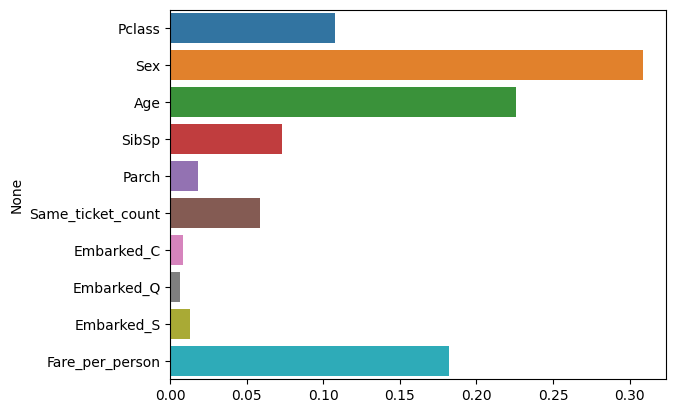

In [53]:
print(model.feature_importances_)

sns.barplot(x=model.feature_importances_, y=feature_names, hue=feature_names)

In [65]:
model.feature_names_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'feature_names_'

## 3.1 RandomSearchCV로 여러 알고리즘의 최적의 하이퍼 파라미터를 찾기

```RandomForestClassifier```와 ```GradientBoostingClassifier``` 모델들을 사용하여 예측을 하도록 하겠습니다.\
또한 ```RandomSearchCV```를 사용하여 최적의 파라미터를 구해주겠습니다.

In [54]:
# 모델들을 나열
estimators = [RandomForestClassifier(random_state=42),
              GradientBoostingClassifier(random_state=42)]

In [55]:
# 최적값을 구하고 싶은 파라미터를 정리
param_distributions = {
    'max_depth' : np.random.randint(2, 20, 10),
    'max_features' : np.random.uniform(0.3, 1.0, 10)}

results = {}
for estimator in estimators:

    # DecisionTree가 아닐 경우  n_estimators 파라미터 추가
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions['n_estimators'] = np.random.randint(100, 200, 10)

    rs_cv = RandomizedSearchCV(estimator, param_distributions,
                            n_iter=10, scoring='accuracy',
                            n_jobs=-1, cv=5, verbose=2)

    rs_cv.fit(X_train, y_train)

    results.update({estimator.__class__.__name__ : (rs_cv.best_params_,
                                                    rs_cv.best_score_,
                                                    rs_cv.score(X_test, y_test),
                                                    rs_cv.cv_results_)})

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [57]:
pd.DataFrame(results, index=['best_params_', 'best_score_', 'test_score', 'cv_results_']).transpose()

best_params_  \
RandomForestClassifier      {'n_estimators': 159, 'max_features': 0.395197...   
GradientBoostingClassifier  {'n_estimators': 150, 'max_features': 0.795858...   

                           best_score_ test_score  \
RandomForestClassifier        0.823028   0.826816   
GradientBoostingClassifier    0.800611   0.837989   

                                                                  cv_results_  
RandomForestClassifier      {'mean_fit_time': [1.9063177108764648, 1.08668...  
GradientBoostingClassifier  {'mean_fit_time': [0.4812755107879639, 2.36676...

---

---



In [58]:
# train_test_split으로 학습/예측 데이터셋을 분류합니다. 비율 학습 8 : 예측 2
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled[feature_names], df_scaled[label_name], test_size=0.2, random_state=42)

In [60]:
# 최적값을 구하고 싶은 파라미터를 정리
param_distributions = {
    'max_depth' : np.random.randint(2, 20, 10),
    'max_features' : np.random.uniform(0.3, 1.0, 10)}

results = {}
for estimator in estimators:

    # DecisionTree가 아닐 경우  n_estimators 파라미터 추가
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions['n_estimators'] = np.random.randint(100, 200, 10)

    rs_cv = RandomizedSearchCV(estimator, param_distributions,
                            n_iter=10, scoring='accuracy',
                            n_jobs=-1, cv=5, verbose=2)

    rs_cv.fit(X_train, y_train)

    results.update({estimator.__class__.__name__ : (rs_cv.best_params_,
                                                    rs_cv.best_score_,
                                                    rs_cv.score(X_test, y_test),
                                                    rs_cv.cv_results_)})

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [61]:
pd.DataFrame(results, index=['best_params_', 'best_score_', 'test_score', 'cv_results_']).transpose()

best_params_  \
RandomForestClassifier      {'n_estimators': 156, 'max_features': 0.523968...   
GradientBoostingClassifier  {'n_estimators': 175, 'max_features': 0.719834...   

                           best_score_ test_score  \
RandomForestClassifier         0.82023   0.810056   
GradientBoostingClassifier    0.796405   0.810056   

                                                                  cv_results_  
RandomForestClassifier      {'mean_fit_time': [0.7040484428405762, 0.54097...  
GradientBoostingClassifier  {'mean_fit_time': [1.9538321495056152, 2.49259...